In [15]:
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randint
from numba import jit
from utility import *
from tqdm import tqdm

from sklearn.datasets import make_blobs

In [2]:
#@jit(nopython=True)
def k_means(points, K):
    N = points.shape[0]
    dimension = points.shape[1]
    #inizializzazione dei centroidi in corrispondenza di K punti 
    centroids = np.zeros((K,dimension))
    clusters = np.zeros(N)
    choices = np.arange(N)
    for i in range(K):
        choice = np.random.randint(len(choices))
        centroids[i] = points[choice].copy()#centroids_list[i]
        choices = np.delete(choices, choice)
    finito = False
    iter = 0
    while(finito == False):
        for i in range(N):
            dist = -1
            centroid = -1
            for c in range(K):
                dist_c = np.linalg.norm(centroids[c]-points[i])
                if(dist_c < dist or dist == -1):
                    centroid = c
                    dist = dist_c
            clusters[i] = centroid        
        old_centroids = centroids.copy()

        for i in range(K): #calcolo nuovi centroidi
            centroids[i] = np.zeros(dimension)
            n_elem = 0
            for j in range(N):
                if clusters[j] == i:
                    n_elem = n_elem+1
                    centroids[i] = centroids[i] + points[j]
            if(n_elem == 0):
                centroids[i] = points[np.random.randint(len(choices))].copy()
            else:
                centroids[i] = centroids[i] / n_elem

        iter = iter + 1
        if((old_centroids == centroids).all()):
            finito = True
                


    return clusters, centroids

In [13]:
#points = load_points('C:/Users/franc/Desktop/prova.txt')

points, centroids = make_blobs(n_samples=500, centers=5, n_features=2, random_state=2)

N = len(points)
K = 5

sol, centroids = k_means(points, K)

print("{:.5E}".format(squared_inner_distance(sol, points, K)))

1.17388E+03


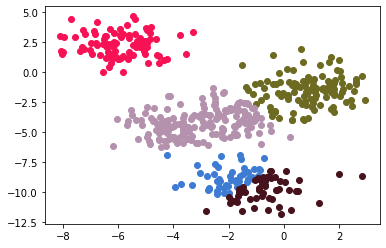

In [14]:
printR2sol(points, sol, K)

In [ ]:
values = []
L = int(N/5)
for i in tqdm(range(1,L)):
    best_val = 0
    for j in range(10):
        clusters, centroids = k_means(points, i)
        val = squared_inner_distance(clusters, points, i)
        if( val < best_val or j == 0):
            best_val = val
    values.append(best_val)

plt.plot(range(1,L), values)



In [ ]:
def elbow_method(values):
    values = np.array(values)
    values = values/np.max(values)
    diffs = (values[:-1]-values[1:])/values[:-1]
    print(diffs)
    diffs = diffs[:-1] - diffs[1:]
    print(diffs)

    return np.argmax(diffs) + 1

In [ ]:
print(f"Il valore ottimo di cluster per questo problema è {elbow_method(values)}")

In [ ]:
#testiamo il kmeans sulle 10 istanze di test:

n_points = [500,1000,2000,5000,1400,10000,4000,7000,300,800]
n_clusters = [7,4,3,2,3,2,4,5,4,6,4]
dim_points = [32,3,2,2,3,2,3,2,64,32]

vals = []

for test in tqdm(range(1,11)):
    points = load_points(f'C:/Users/franc/Documents/GitHub/Ricerca_Operativa_2022/Ricerca_Operativa_2022/benchmark/benchmark{test}.txt')
    N = len(points)
    K = n_clusters[test-1]
    sol, centroids = k_means(points, K)
    vals.append(squared_inner_distance(sol, points, K))
    
    if(dim_points == 2):
        printR2sol(points, sol, K)